In [88]:
import os
import sys
# import spateo as st
sys.path.insert(0,'../')
import morpho
import matplotlib.pyplot as plt
import scanpy
import anndata
import numpy as np
from jupyterthemes import jtplot
# jtplot.style(theme="grade3")
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
adata = anndata.read('../data/SCT_h5ad/E16-18h_a_SCT_anno.h5ad')
slices = [adata[adata.obs['slice_ID']==sliceID] for sliceID in adata.obs['slice_ID'].cat.categories]
for i in range(len(slices)):slices[i].obsm['spatial'] = slices[i].obsm['spatial'].to_numpy()[:,0:2]

In [91]:
%matplotlib auto
i = 1
BAS_slices = [slice.copy() for slice in slices]
sliceA = BAS_slices[i]
# sliceA = scanpy.read_h5ad(os.path.join(data_dir, files[i]))
sliceB = BAS_slices[i + 1]
# sliceB = scanpy.read_h5ad(os.path.join(data_dir, files[i+1]))
sliceA_align, sliceB_align, P = morpho.morpho_align_pairwise(
            model=sliceA,
            model_ref=sliceB,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=True,
            mode="SN",
            max_iter=100,
            vis_optimiation=True,
            print_info=True,
            lambdaVF = 5,
            beta = 0.05,
            beta2 = 0.5
            )


Using matplotlib backend: agg
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 518 common genes.
|-----> Coordinates normalization param:
|-----------> Mean: [-1.86045977e-13 -1.41756712e-12], [-4.51862842e-12 -9.73587681e-12].
|-----------> Scale: 13.78222805713538.
|-----> Gene expression normalization param:
|-----------> Mean: [0.11795116 0.16813163 0.14943035 0.23828498 0.30886027 0.1520558
 0.20281345 0.36041456 0.16939703 0.13499096 0.15153076 0.13608983
 0.6684959  0.09973894 0.3057803  0.20744134 0.16983104 0.18389276
 0.17941017 0.16052906 0.13545053 0.16428097 0.18622966 0.21844251
 0.14379528 0.31220558 0.18258397 0.18632104 0.19719385 0.29588306
 0.16992126 0.2926839  0.1457309  0.21194969 0.16031012 0.20137057
 0.18780309 0.18339777 0.19175968 0.2973796  0.06923106 0.1565321
 0.24434052 0.18895164 0.19676375 0.18737939 0.2836475  0.20854528
 0.23987134 0.20757328 0.19522983 0.27541465 0.1497221  0.2856024
 0.172355

MovieWriter ffmpeg unavailable; using Pillow instead.


In [81]:
import paste as pst
sliceA_paste, sliceB_paste = slices[i].copy(), slices[i+1].copy()
pi = pst.pairwise_align(sliceA_paste, sliceB_paste, use_gpu=True)
pis = [pi]
new_slices = pst.stack_slices_pairwise([sliceA_paste, sliceB_paste], pis)

We currently only have gpu support for Pytorch, please set backend = ot.backend.TorchBackend(). Reverting to selected backend cpu.


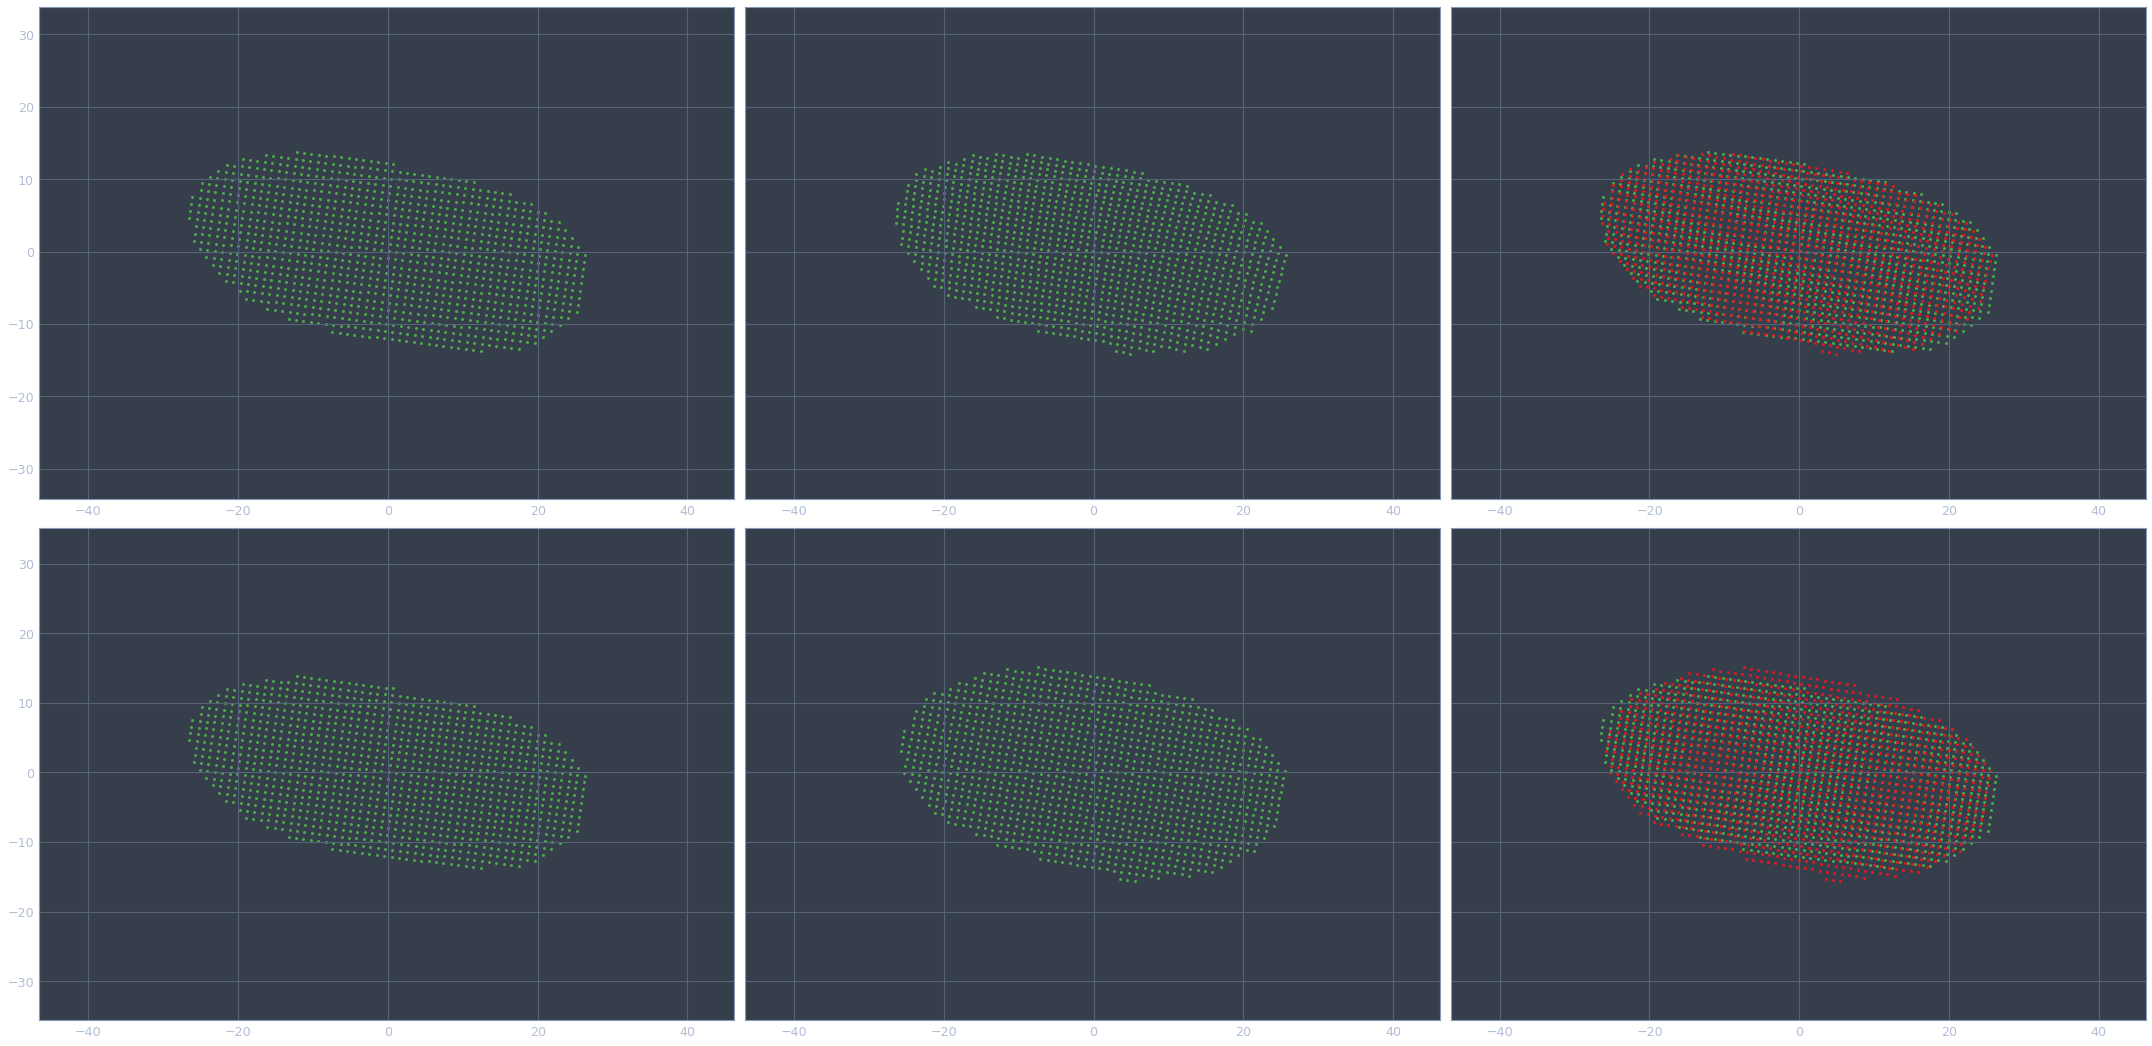

In [82]:
%matplotlib inline
xmin,xmax = np.min([np.min(sliceB_align.obsm['align_spatial'][:,0]),np.min(sliceA_align.obsm['align_spatial'][:,0])]),np.max([np.max(sliceB_align.obsm['align_spatial'][:,0]),np.max(sliceA_align.obsm['align_spatial'][:,0])])
ymin,ymax = np.min([np.min(sliceB_align.obsm['align_spatial'][:,1]),np.min(sliceA_align.obsm['align_spatial'][:,1])]),np.max([np.max(sliceB_align.obsm['align_spatial'][:,1]),np.max(sliceA_align.obsm['align_spatial'][:,1])])
dot_size = 8
margin = 20
scale=(ymax-ymin+2*margin)/(xmax-xmin+2*margin)
fig, axs = plt.subplots(2, 3,figsize=(30,20*scale))
axs[0,0].scatter(sliceA_align.obsm['align_spatial'][:,0],sliceA_align.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
axs[0,0].set_xlim([xmin-margin,xmax+margin])
axs[0,0].set_ylim([ymin-margin,ymax+margin])
axs[0,1].scatter(sliceB_align.obsm['align_spatial'][:,0],sliceB_align.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
axs[0,1].set_xlim([xmin-margin,xmax+margin])
axs[0,1].set_ylim([ymin-margin,ymax+margin])
axs[0,1].set_yticklabels([])
axs[0,2].scatter(sliceA_align.obsm['align_spatial'][:,0],sliceA_align.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[2])
axs[0,2].scatter(sliceB_align.obsm['align_spatial'][:,0],sliceB_align.obsm['align_spatial'][:,1],s=dot_size,c=slice_colors[0])
axs[0,2].set_xlim([xmin-margin,xmax+margin])
axs[0,2].set_ylim([ymin-margin,ymax+margin])
axs[0,2].set_yticklabels([])
# plt.tight_layout()
# plt.show()
xmin,xmax = np.min([np.min(new_slices[0].obsm['spatial'][:,0]),np.min(new_slices[1].obsm['spatial'][:,0])]),np.max([np.max(new_slices[0].obsm['spatial'][:,0]),np.max(new_slices[1].obsm['spatial'][:,0])])
ymin,ymax = np.min([np.min(new_slices[0].obsm['spatial'][:,1]),np.min(new_slices[1].obsm['spatial'][:,1])]),np.max([np.max(new_slices[0].obsm['spatial'][:,1]),np.max(new_slices[1].obsm['spatial'][:,1])])
dot_size = 8
# fig, axs = plt.subplots(1, 3,figsize=(30,5))
axs[1,0].scatter(new_slices[0].obsm['spatial'][:,0],new_slices[0].obsm['spatial'][:,1],s=dot_size,c=slice_colors[2])
axs[1,0].set_xlim([xmin-margin,xmax+margin])
axs[1,0].set_ylim([ymin-margin,ymax+margin])
axs[1,1].scatter(new_slices[1].obsm['spatial'][:,0],new_slices[1].obsm['spatial'][:,1],s=dot_size,c=slice_colors[2])
axs[1,1].set_xlim([xmin-margin,xmax+margin])
axs[1,1].set_ylim([ymin-margin,ymax+margin])
axs[1,1].set_yticklabels([])
axs[1,2].scatter(new_slices[0].obsm['spatial'][:,0],new_slices[0].obsm['spatial'][:,1],s=dot_size,c=slice_colors[2])
axs[1,2].scatter(new_slices[1].obsm['spatial'][:,0],new_slices[1].obsm['spatial'][:,1],s=dot_size,c=slice_colors[0])
axs[1,2].set_xlim([xmin-margin,xmax+margin])
axs[1,2].set_ylim([ymin-margin,ymax+margin])
# axs[1,2].set_yticks([])
axs[1,2].set_yticklabels([])
# axs[1,2].grid(True)
plt.tight_layout()
plt.show()

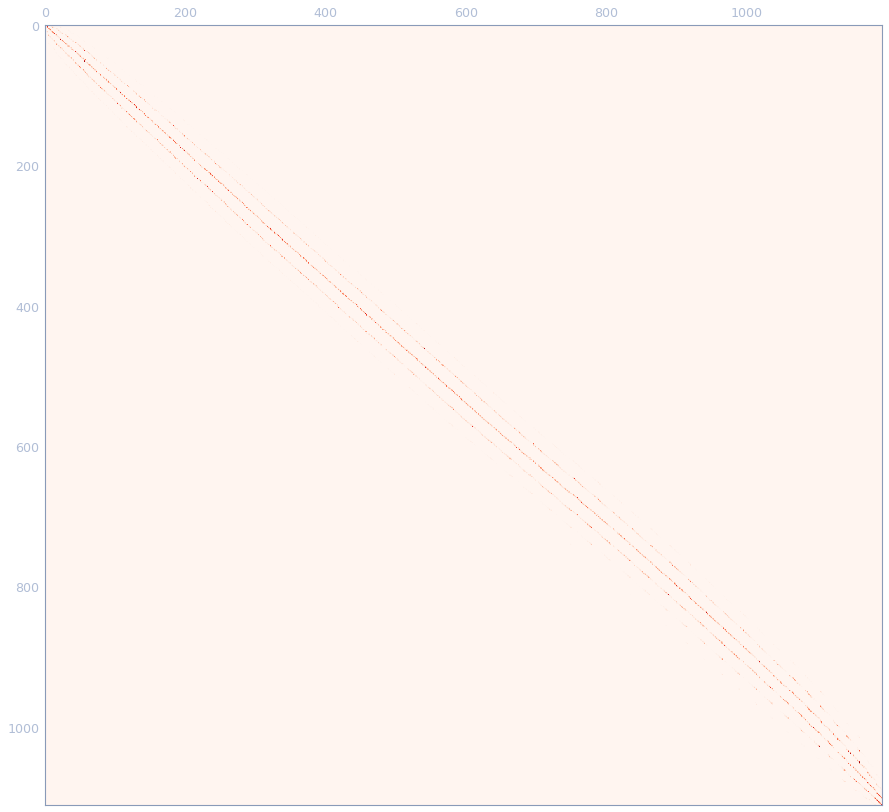

In [83]:
vis_P = P.T.copy()
vis_P = vis_P / np.max(vis_P)
# vis_P[vis_P < 0.05] = 0
# vis_P[vis_P > 0.25] = 1
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(vis_P, cmap="Reds")
# ax.axis('off')
ax.grid(False)
plt.show()

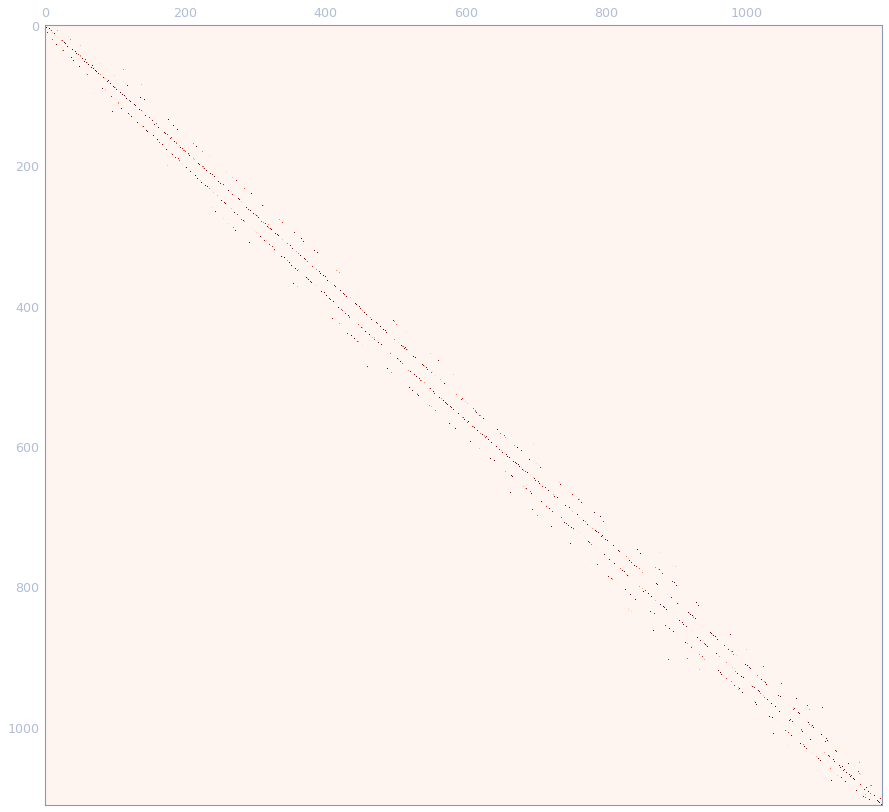

In [84]:
vis_P = pi.copy()
vis_P = vis_P / np.max(vis_P)
vis_P[vis_P < 0.05] = 0
fig, ax = plt.subplots(figsize=(15,15))
ax.matshow(vis_P, cmap="Reds")
ax.grid(False)
plt.show()